## Lesson 2 Homework
### TLombardi

#### 1. Assume all spatial data is in WGS84

In [1]:
# Imports
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 2. Implement the haversine function to calculate the distance between two lon/lat coordinates and vectorize it using numpy

In [2]:
# Adapted formula from comments in https://gist.github.com/rochacbruno/2883505
def distance_vectorize(s_lat, s_lng, e_lat, e_lng, df):
    
    # approximate radius of earth in km
    R = 6371.0
    
    s_lat = s_lat*np.pi/180.0                      
    s_lng = np.deg2rad(s_lng)     
    e_lat = np.deg2rad(e_lat)                       
    e_lng = np.deg2rad(e_lng)  
    
    d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2
    
    df['haversine_distance_km'] = 2 * R * np.arcsin(np.sqrt(d))

#### 3. Implement a function to convert lon/lat values to Web Mercator and vectorize it using numpy
- *need to test*

In [3]:
# adapted from https://gist.github.com/javisantana/a80cff8b1aa56e0e9834bc40e435cb07
"""
projects a numpy array with (lon, lat) to (x, y) in mercator coordinates using numpy
license: MIT
adapted from https://github.com/mapbox/mercantile
"""

def xy(lng, lat, df, truncate=False):
    """Convert longitude and latitude to web mercator x, y
    Parameters
    ----------
    lnglat : np.array
        Longitude and latitude array in decimal degrees, shape: (-1, 2)
    truncate : bool, optional
        Whether to truncate or clip inputs to web mercator limits.
    Returns
    -------
    np.array with x, y in webmercator
    >>> a = np.array([(0.0, 0.0), (-75.15963, -14.704620000000013)])
    >>> b = np.array(((0.0, 0.0), (-8366731.739810849, -1655181.9927159143)))
    >>> np.isclose(xy(a), b)
    array([[ True,  True],
           [ True,  True]], dtype=bool)
    """

    if truncate:
        lng = numpy.clip(lng, -180.0, 180.0)
        lat = numpy.clip(lng, -90.0, 90.0)
    x = 6378137.0 * np.radians(lng)
    y = 6378137.0 * np.log(
        np.tan((math.pi * 0.25) + (0.5 * np.radians(lat))))
    df['x'] = x
    df['y'] = y

#### 4. Read the train.csv from [Kaggle.com](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction) file using pandas
- *pull straight from Kaggle? https://github.com/Kaggle/kaggle-api*

In [4]:
# Read file path
train_filepath = "C:/Users/TVL/Desktop/SP20_GeoAI/Lesson02/new-york-city-taxi-fare-prediction/train.csv"

In [5]:
# Read the file into a variable train_data
train_data = pd.read_csv(train_filepath, 
                         delimiter=',',
                         index_col=0,
                         nrows = 500_000, 
                         parse_dates=["pickup_datetime"])

In [6]:
# list first few rows (datapoints)
train_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
key,,,,,,,
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [7]:
# check datatypes
train_data.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [8]:
# Locate null data
train_data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
dtype: int64

In [9]:
# Clean up data
print('Old size: %d' % len(train_data))
train_data = train_data.replace(np.nan,0)
train_data.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(train_data))

Old size: 500000
New size: 500000


#### 6. Make sure to read the pickup dates as timestamps

In [10]:
# Add columns with day of week and hour of day values
train_data = train_data.set_index('pickup_datetime')
train_data['DayofWeek'] = train_data.index.dayofweek
train_data['Hour'] = train_data.index.hour

# Display a random sampling of 5 rows
train_data.sample(5, random_state=0)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,DayofWeek,Hour
pickup_datetime,,,,,,,,
2014-06-17 18:09:09+00:00,24.5,-74.010745,40.709325,-73.924750,40.690980,2,1,18
2013-09-01 09:26:00+00:00,6.5,-73.992822,40.728227,-74.002087,40.738277,2,6,9
2010-06-29 21:19:00+00:00,6.9,-73.990750,40.730687,-73.990847,40.749648,1,1,21
2010-11-23 12:51:18+00:00,4.1,-74.005450,40.745924,-73.998245,40.756035,1,1,12
2009-11-24 15:50:59+00:00,11.7,-73.980270,40.745946,-73.976583,40.780798,1,1,15


#### 7. Plot using seaborn the distribution by:
     - day of week
     - hour of day

Text(0.5, 0, 'Day of the Week')

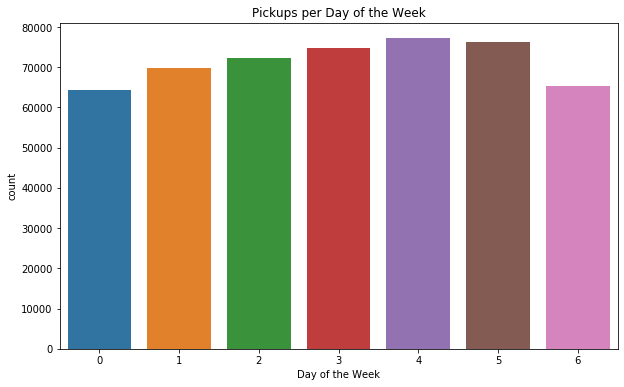

In [11]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Pickups per Day of the Week")

# Bar chart showing total counts of pickup days of the week
sns.countplot('DayofWeek', data=train_data)

# Add label for vertical axis
plt.xlabel("Day of the Week")

Text(0.5, 0, 'Hour of the Day')

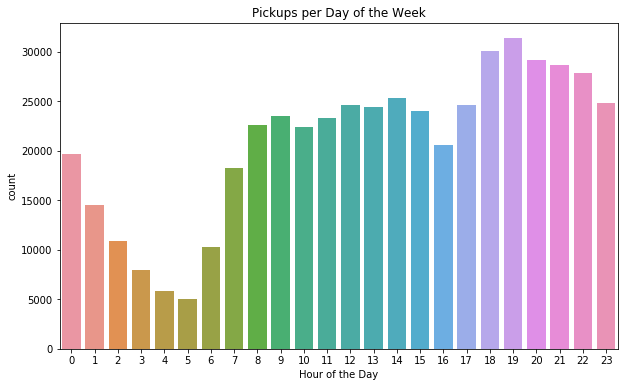

In [12]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Pickups per Day of the Week")

# Bar chart showing total counts of pickups per hour of the day
sns.countplot('Hour', data=train_data)

# Add label for vertical axis
plt.xlabel("Hour of the Day")

#### 8. Append the haversine distance to the trip record and show top 10 longest records

In [13]:
# Append the haversine distance to the trip record 
distance_vectorize(train_data.pickup_latitude, 
                   train_data.pickup_longitude,
                   train_data.dropoff_latitude,
                   train_data.dropoff_longitude, 
                   train_data)

# Show top 10 longest records
train_data.nlargest(10,['haversine_distance_km'])

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,DayofWeek,Hour,haversine_distance_km
pickup_datetime,,,,,,,,,
2012-03-11 01:56:00+00:00,4.10,-2986.242495,-880.627428,-3383.296608,-2559.748913,1,6,1,12399.956433
2012-05-24 09:00:00+00:00,17.70,-73.997572,40.720945,-1329.621332,40.773717,1,3,9,10942.515639
2011-02-26 03:28:03+00:00,14.50,0.000000,0.000000,-75.433371,40.752047,1,5,3,8786.235625
2011-04-19 17:56:04+00:00,38.90,0.000000,0.000000,-75.423754,40.773877,1,1,17,8785.843243
2011-05-11 20:06:55+00:00,34.50,0.000000,0.000000,-75.294555,40.699667,1,2,20,8773.725816
2011-04-03 13:59:31+00:00,5.70,0.000000,0.000000,-74.689831,40.190564,1,6,13,8713.610002
2011-10-18 08:06:00+00:00,13.70,-74.592145,40.301512,0.000000,0.000000,1,1,8,8707.602344
2015-03-25 12:56:31+00:00,120.75,-74.402847,40.698772,0.000000,0.000000,1,2,12,8699.681549
2012-02-04 14:56:00+00:00,135.50,-74.289975,40.783655,0.000000,0.000000,1,5,14,8692.025319


#### 9. Convert the lon/lat values to web mercator value using the above function

In [14]:
# Convert the pickup lon/lat values to web mercator value 
xy(train_data.pickup_longitude, 
   train_data.pickup_latitude, 
   train_data)
train_data.rename(columns={'x':'pickup_x',
                           'y':'pickup_y'},
                  inplace=True)
train_data.head()

C:\Users\TVL\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,DayofWeek,Hour,haversine_distance_km,pickup_x,pickup_y
pickup_datetime,,,,,,,,,,,
2009-06-15 17:26:21+00:00,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0,17,1.030764,-8.220311e+06,4.971323e+06
2010-01-05 16:52:16+00:00,16.9,-74.016048,40.711303,-73.979268,40.782004,1,1,16,8.450134,-8.239429e+06,4.969852e+06
2011-08-18 00:35:00+00:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2,3,0,1.389525,-8.235721e+06,4.977193e+06
2012-04-21 04:30:42+00:00,7.7,-73.987130,40.733143,-73.991567,40.758092,1,5,4,2.799270,-8.236210e+06,4.973060e+06
2010-03-09 07:51:00+00:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1,7,1.999157,-8.234091e+06,4.978183e+06


In [15]:
# Convert the dropoff lon/lat values to web mercator value 
xy(train_data.dropoff_longitude, 
   train_data.dropoff_latitude, 
   train_data)
train_data.rename(columns={'x':'drop_x',
                           'y':'drop_y'},
                  inplace=True)
train_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,DayofWeek,Hour,haversine_distance_km,pickup_x,pickup_y,drop_x,drop_y
pickup_datetime,,,,,,,,,,,,,
2009-06-15 17:26:21+00:00,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0,17,1.030764,-8.220311e+06,4.971323e+06,-8.220010e+06,4.969995e+06
2010-01-05 16:52:16+00:00,16.9,-74.016048,40.711303,-73.979268,40.782004,1,1,16,8.450134,-8.239429e+06,4.969852e+06,-8.235334e+06,4.980240e+06
2011-08-18 00:35:00+00:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2,3,0,1.389525,-8.235721e+06,4.977193e+06,-8.236667e+06,4.975619e+06
2012-04-21 04:30:42+00:00,7.7,-73.987130,40.733143,-73.991567,40.758092,1,5,4,2.799270,-8.236210e+06,4.973060e+06,-8.236704e+06,4.976726e+06
2010-03-09 07:51:00+00:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1,7,1.999157,-8.234091e+06,4.978183e+06,-8.232817e+06,4.980499e+06


#### 10. Plot the top 10000 pickup locations in lower Manhattan in Web Mercator 
- you have to aggregate by 100 meters, plot the aggregated locations with the most counts

In [16]:
# Locate null data
train_data.isnull().sum()

fare_amount              0
pickup_longitude         0
pickup_latitude          0
dropoff_longitude        0
dropoff_latitude         0
passenger_count          0
DayofWeek                0
Hour                     0
haversine_distance_km    0
pickup_x                 0
pickup_y                 3
drop_x                   0
drop_y                   1
dtype: int64

In [17]:
# Clean up data
print('Old size: %d' % len(train_data))
train_data = train_data.replace(np.nan,0)
train_data.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(train_data))

Old size: 500000
New size: 500000


In [18]:
# Export clean data to new csv
train_data.to_csv('C:/Users/TVL/Desktop/SP20_GeoAI/Lesson02/new-york-city-taxi-fare-prediction/train_clean.csv', 
                  encoding='utf-8', 
                  index=None)

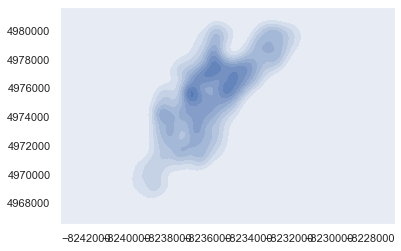

In [19]:
# Set default aesthetic parameters
sns.set()

# Set spatial boundary (bounding box) for lower Manhattan
lon_min,lat_min,lon_max,lat_max=[-8243026.731152424, 
                                 4967901.93839564,
                                 -8227373.318315546, 
                                 4980269.68630016]

# Load the training data and extract only web mercator pickup locations
data=np.loadtxt(r'C:/Users/TVL/Desktop/SP20_GeoAI/Lesson02/new-york-city-taxi-fare-prediction/train_clean.csv',
                skiprows=1,
                delimiter=',',
                usecols=(9,10))

# Make views
x = data[:,0]
y = data[:,1]

# Boolean filter the data based on spatial boundary
data = data[(lat_min<y)&
            (y<lat_max)&
            (lon_min<x)&
            (x<lon_max)]

# Create a KDE plot of the first 10,000 records
n = 10000
ax = sns.kdeplot(data=data[:n,0],
                 data2=data[:n,1],
                 shade=True)

#### 5. Show a kde plot of dropoff locations that originated from JFK

In [20]:
# Set default aesthetic parameters
sns.set()

# Set spatial boundary (bounding box) for JFK airport
lon_min,lat_min,lon_max,lat_max=[-8217751.3068,
                                 4958508.2109,
                                 -8211948.4444, 
                                 4963056.3096]

# Load the training data and extract only web mercator pickup and dropoff locations
data=np.loadtxt(r'C:/Users/TVL/Desktop/SP20_GeoAI/Lesson02/new-york-city-taxi-fare-prediction/train_clean.csv',
                skiprows=1,
                delimiter=',',
                usecols=(9,10,11,12))
data

array([[-8220311.09850013,  4971322.77391268, -8220010.4245555 ,
         4969994.91764176],
       [-8239428.77389049,  4969851.72966681, -8235334.44301912,
         4980240.28333621],
       [-8235720.72165217,  4977192.55825829, -8236667.38260188,
         4975618.94384365],
       ...,
       [-8235848.40510811,  4971953.20527013, -8226118.7476543 ,
         4968335.82804148],
       [-8234816.69655664,  4976493.26025252, -8234323.25307404,
         4977711.52235882],
       [-8236166.5562128 ,  4971450.26700285, -8235724.0612369 ,
         4970149.41614691]])

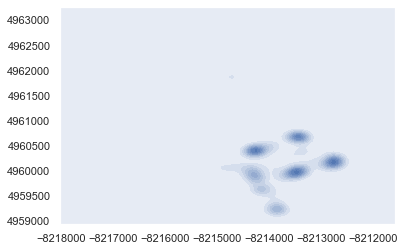

In [21]:
# Make views
x = data[:,2]
y = data[:,3]

# Boolean filter the data based on spatial boundary
data = data[(lat_min<y)&
            (y<lat_max)&
            (lon_min<x)&
            (x<lon_max)]

# Create a KDE plot of the first 100,000 records
n = 100000
ax = sns.kdeplot(data=data[:n,2],
                 data2=data[:n,3],
                 shade=True)